In [1]:
pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [3]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [4]:
!jt -t chesterish -f inputmono -fs 11 -nf opensans -ofs 10 -altmd -altout -cellw 92%  -T -N -kl

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Question 5: Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first 6 rows.

In [6]:
gdp = pd.read_csv('data/gdp_percapita.csv', nrows=6868)
gdp.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


### Question 6 Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [7]:
internet = pd.read_csv('data/internet_use.csv',nrows=4495)

In [8]:
internet.head(6)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [9]:
internet.tail(6)

,Country or Area,Year,Value,Value Footnotes
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


### Question 7 Look at the shape of each DataFrame - how many rows? How many columns?
gdp: 6868 rows, 4 columns
internet 4495 rows, 4 columns

In [10]:
gdp.shape

(6868, 4)

In [11]:
internet.shape

(4495, 4)

### Question 8: Take a look at the datatypes for the columns in each DataFrame.

In [12]:
type(gdp)

pandas.core.frame.DataFrame

In [13]:
type(internet)

pandas.core.frame.DataFrame

In [14]:
gdp.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [15]:
internet.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

### Question 9Take a look at the last 10 rows of each DataFrame in turn.

In [16]:
gdp.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [17]:
internet.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


### Question 10. Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.

In [18]:
gdp2 = gdp.drop(columns = ['Value Footnotes'])

In [19]:
gdp2.head(6)

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
5,Afghanistan,2014,2102.385234


In [20]:
internet2 = internet.drop(columns = ['Value Footnotes'])

In [21]:
internet2.head(6)

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000


### Question 11.	Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [22]:
gdp2 = gdp2.rename(columns = {'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})
gdp2.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


### Question 12.	Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [23]:
internet2 = internet2.rename(columns = {'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'})
internet2.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


### Question 13.Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.

In [24]:
gdp_and_internet_use= pd.merge(gdp2,internet2, how='outer', on=['Country','Year'])

### Question 14.Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [25]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


### Question 15.Look at the last five rows to make sure the data is clean and as expected.

In [26]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


### Question 16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [27]:
q13year=[2004,2009,2014]
gdp_and_internet_use[gdp_and_internet_use['Year'].isin(q13year)]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
7868,Virgin Islands (U.S.),2009,NaN,27.396510
7873,Virgin Islands (U.S.),2004,NaN,27.377009
7885,Yemen,2014,NaN,22.550000
7890,Yemen,2009,NaN,9.960000


In [28]:
gdp_and_internet_use.info

<bound method DataFrame.info of           Country  Year  GDP_Per_Capita  Internet_Users_Pct
0     Afghanistan  2019     2065.036398                 NaN
1     Afghanistan  2018     2033.779002                 NaN
2     Afghanistan  2017     2058.383832                 NaN
3     Afghanistan  2016     2057.062164                 NaN
4     Afghanistan  2015     2068.265904                 NaN
...           ...   ...             ...                 ...
7900        Yemen  1999             NaN            0.056629
7901        Yemen  1998             NaN            0.023323
7902        Yemen  1997             NaN            0.015025
7903        Yemen  1996             NaN            0.000621
7904        Yemen  1990             NaN            0.000000

[7905 rows x 4 columns]>

In [29]:
gdp_and_internet_use.head(10)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,6.390000
6,Afghanistan,2013,2116.465454,5.900000
7,Afghanistan,2012,2075.491747,5.454545
8,Afghanistan,2011,1904.559799,5.000000
9,Afghanistan,2010,1957.029338,4.000000


### Question 17.Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [30]:
y2004 = gdp_and_internet_use[gdp_and_internet_use['Year']==2004]

In [31]:
y2004.info

<bound method DataFrame.info of                     Country  Year  GDP_Per_Capita  Internet_Users_Pct
15              Afghanistan  2004     1200.278256            0.105809
33                  Albania  2004     7604.838002            2.420388
63                  Algeria  2004    10058.435939            4.634475
93                   Angola  2004     5593.241537            0.464815
123     Antigua and Barbuda  2004    18745.681534           24.266544
...                     ...   ...             ...                 ...
7771     T.F.Y.R. Macedonia  2004             NaN           24.440000
7829              Venezuela  2004             NaN            8.404470
7853               Viet Nam  2004             NaN            7.642409
7873  Virgin Islands (U.S.)  2004             NaN           27.377009
7895                  Yemen  2004             NaN            0.881223

[276 rows x 4 columns]>

In [32]:
y2009 = gdp_and_internet_use[gdp_and_internet_use['Year']==2009]

In [33]:
y2009.info

<bound method DataFrame.info of                     Country  Year  GDP_Per_Capita  Internet_Users_Pct
10              Afghanistan  2009     1758.904043             3.55000
28                  Albania  2009    10346.864199            41.20000
58                  Algeria  2009    10782.361398            11.23000
88                   Angola  2009     7643.493749             6.00000
118     Antigua and Barbuda  2009    20046.839017            42.00000
...                     ...   ...             ...                 ...
7766     T.F.Y.R. Macedonia  2009             NaN            51.77000
7824              Venezuela  2009             NaN            32.70000
7848               Viet Nam  2009             NaN            26.55000
7868  Virgin Islands (U.S.)  2009             NaN            27.39651
7890                  Yemen  2009             NaN             9.96000

[277 rows x 4 columns]>

In [34]:
y2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]

In [35]:
y2014.info

<bound method DataFrame.info of                     Country  Year  GDP_Per_Capita  Internet_Users_Pct
5               Afghanistan  2014     2102.385234                6.39
23                  Albania  2014    11623.866679               60.10
53                  Algeria  2014    11512.705405               18.09
83                   Angola  2014     8239.828837               21.26
113     Antigua and Barbuda  2014    18104.241470               64.00
...                     ...   ...             ...                 ...
7761     T.F.Y.R. Macedonia  2014             NaN               68.06
7819              Venezuela  2014             NaN               57.00
7843               Viet Nam  2014             NaN               48.31
7863  Virgin Islands (U.S.)  2014             NaN               50.07
7885                  Yemen  2014             NaN               22.55

[277 rows x 4 columns]>

### Question 18.	Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [36]:
y2014.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


### Question 19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [37]:
y2014.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.00
7137,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7674,Somalia,2014,NaN,1.63
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


### Question 20.	Repeat for 2004 and 2009.

In [38]:
y2004.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6019,Sweden,2004,44496.023401,83.89
2635,Iceland,2004,45145.545658,83.88
1462,Denmark,2004,50607.628971,80.93
4658,Norway,2004,60893.410993,77.69
7400,Korea (Rep. of),2004,NaN,72.70
...,...,...,...,...
6437,Tuvalu,2004,3336.952920,NaN
6617,Upper middle income,2004,8567.061394,NaN
6737,Vietnam,2004,3689.732423,NaN
6767,West Bank and Gaza,2004,4485.525458,NaN


In [39]:
y2004.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7088,Dem. People's Rep. of Korea,2004,NaN,0.000000
4342,Myanmar,2004,1696.881760,0.024337
3545,Liberia,2004,1181.546158,0.031011
6079,Tajikistan,2004,1737.743630,0.077480
15,Afghanistan,2004,1200.278256,0.105809
...,...,...,...,...
6437,Tuvalu,2004,3336.952920,NaN
6617,Upper middle income,2004,8567.061394,NaN
6737,Vietnam,2004,3689.732423,NaN
6767,West Bank and Gaza,2004,4485.525458,NaN


In [40]:
y2009.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2630,Iceland,2009,48177.084123,93.00
4653,Norway,2009,61886.564498,92.08
6014,Sweden,2009,45638.035577,91.00
4443,Netherlands,2009,51772.424928,89.63
3696,Luxembourg,2009,104932.811953,87.31
...,...,...,...,...
6194,The Gambia,2009,2283.183556,NaN
6612,Upper middle income,2009,11212.934078,NaN
6732,Vietnam,2009,4830.304958,NaN
6762,West Bank and Gaza,2009,5250.116075,NaN


In [41]:
y2009.sort_values(by = 'Internet_Users_Pct', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7083,Dem. People's Rep. of Korea,2009,NaN,0.000000
6224,Timor-Leste,2009,2724.770973,0.185252
4337,Myanmar,2009,2874.780227,0.220000
5439,Sierra Leone,2009,1372.392285,0.260000
922,Cambodia,2009,2603.583778,0.530000
...,...,...,...,...
6194,The Gambia,2009,2283.183556,NaN
6612,Upper middle income,2009,11212.934078,NaN
6732,Vietnam,2009,4830.304958,NaN
6762,West Bank and Gaza,2009,5250.116075,NaN


### Question 21.	Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [42]:
y2014.sort_values(by = 'GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80
...,...,...,...,...
7761,T.F.Y.R. Macedonia,2014,NaN,68.06
7819,Venezuela,2014,NaN,57.00
7843,Viet Nam,2014,NaN,48.31
7863,Virgin Islands (U.S.),2014,NaN,50.07


### Question 22 Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [43]:
y2014.sort_values(by = 'GDP_Per_Capita', ascending = True)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95
...,...,...,...,...
7761,T.F.Y.R. Macedonia,2014,NaN,68.06
7819,Venezuela,2014,NaN,57.00
7843,Viet Nam,2014,NaN,48.31
7863,Virgin Islands (U.S.),2014,NaN,50.07


### Question 23 Create some scatterplots:
a. 2004 Percent Using the Internet vs GDP Per Capita
b. 2009 Percent Using the Internet vs GDP Per Capita
c. 2014 Percent Using the Internet vs GDP Per Capita

Text(0.5, 1.0, 'Internet Users by Percent and GDP Per Capita in 2004')

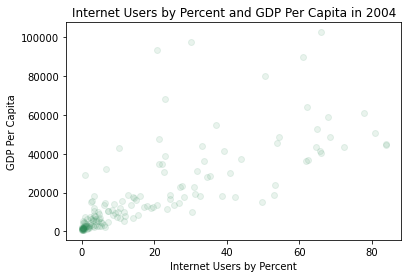

In [44]:
plt.scatter(y2004.Internet_Users_Pct, y2004.GDP_Per_Capita, color='seagreen', alpha=0.1)
plt.xlabel('Internet Users by Percent')
plt.ylabel('GDP Per Capita')
plt.title("Internet Users by Percent and GDP Per Capita in 2004")

Text(0.5, 1.0, 'Internet Users by Percent and GDP Per Capita in 2009')

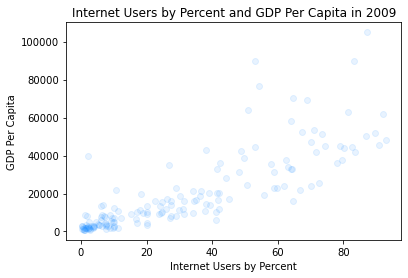

In [45]:
plt.scatter(y2009.Internet_Users_Pct, y2009.GDP_Per_Capita, color='dodgerblue', alpha=0.1)
plt.xlabel('Internet Users by Percent')
plt.ylabel('GDP Per Capita')
plt.title("Internet Users by Percent and GDP Per Capita in 2009")

Text(0.5, 1.0, 'Internet Users by Percent and GDP Per Capita in 2014')

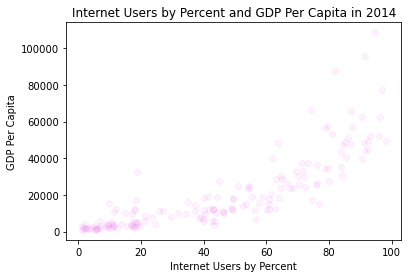

In [46]:
plt.scatter(y2014.Internet_Users_Pct, y2014.GDP_Per_Capita, color='violet', alpha=0.1)
plt.xlabel('Internet Users by Percent')
plt.ylabel('GDP Per Capita')
plt.title("Internet Users by Percent and GDP Per Capita in 2014")

Text(0.5, 1.0, 'Internet Users by Percent and GDP Per Capita in 2004')

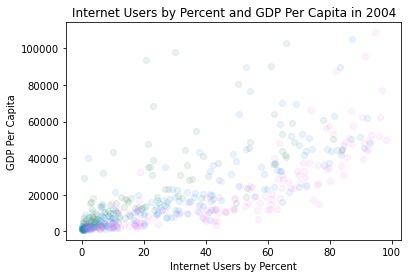

In [47]:
plt.scatter(y2004.Internet_Users_Pct, y2004.GDP_Per_Capita, color='seagreen', alpha=0.1)
plt.scatter(y2009.Internet_Users_Pct, y2009.GDP_Per_Capita, color='dodgerblue', alpha=0.1)
plt.scatter(y2014.Internet_Users_Pct, y2014.GDP_Per_Capita, color='violet', alpha=0.1)
plt.xlabel('Internet Users by Percent')
plt.ylabel('GDP Per Capita')
plt.title("Internet Users by Percent and GDP Per Capita in 2004")

### Question 24 Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Answer 24: Yes, the later the year the less GDP Per Capita difference across internet usage

### Question 25 Look at the distribution of gdp per capita values for 2014. Is it unimodal?

Answer 25: No, not unimodal

### Question 26 Look at the distribution of Internet Use for 2014. Is it unimodal?

Answer 26: Yes, unimodal

### Question 27 What are the top 5 countries in terms of internet use in 2014?

In [48]:
y2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head()


,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90


### Question 28 Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [49]:
y2014_top5=y2014.sort_values(by = 'Internet_Users_Pct', ascending = False).head()


In [50]:
y2014_top5.info

<bound method DataFrame.info of       Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625  Iceland  2014    49652.149500               98.16
561   Bermuda  2014    77361.104881               96.80
4648   Norway  2014    62589.373548               96.30
1452  Denmark  2014    52214.537753               95.99
6871  Andorra  2014             NaN               95.90>

In [51]:
top_5_internet=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(y2014_top5.Country) & gdp_and_internet_use['Year'].isin(q13year)]

In [52]:
top_5_internet.info

<bound method DataFrame.info of       Country  Year  GDP_Per_Capita  Internet_Users_Pct
561   Bermuda  2014    77361.104881           96.800000
566   Bermuda  2009    89961.982744           83.250000
571   Bermuda  2004    90195.811033           60.990867
1452  Denmark  2014    52214.537753           95.990000
1457  Denmark  2009    50274.075696           86.840000
1462  Denmark  2004    50607.628971           80.930000
2625  Iceland  2014    49652.149500           98.160000
2630  Iceland  2009    48177.084123           93.000000
2635  Iceland  2004    45145.545658           83.880000
4648   Norway  2014    62589.373548           96.300000
4653   Norway  2009    61886.564498           92.080000
4658   Norway  2004    60893.410993           77.690000
6871  Andorra  2014             NaN           95.900000
6876  Andorra  2009             NaN           78.530000
6881  Andorra  2004             NaN           26.837954>

### Question 29 Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014? Is there a plotting issue with Bermuda? Can you fix it?

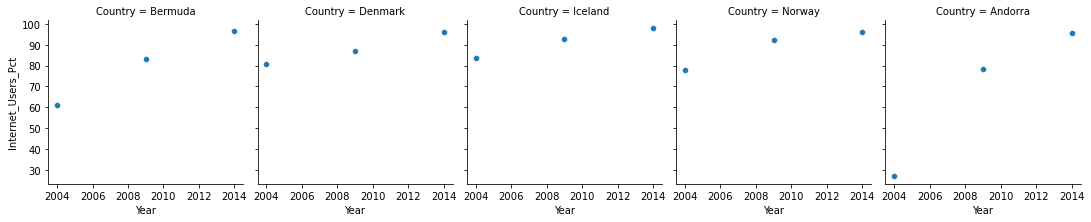

In [53]:
q29=sns.FacetGrid(top_5_internet, col="Country")
q29.map_dataframe(sns.scatterplot, x="Year", y="Internet_Users_Pct")
q29.set_axis_labels("Year","Internet_Users_Pct")


### Question 30 Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

In [54]:
y2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.00
7137,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7674,Somalia,2014,NaN,1.63


In [55]:
y2014_bottom5=y2014.sort_values(by = 'Internet_Users_Pct', ascending = True).head()

In [56]:
y2014_bottom5.info

<bound method DataFrame.info of                           Country  Year  GDP_Per_Capita  Internet_Users_Pct
7079  Dem. People's Rep. of Korea  2014             NaN                0.00
7137                      Eritrea  2014             NaN                0.99
6219                  Timor-Leste  2014     3264.568070                1.14
827                       Burundi  2014      886.235777                1.38
7674                      Somalia  2014             NaN                1.63>

In [57]:
bottom_5_internet=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(y2014_bottom5.Country) & gdp_and_internet_use['Year'].isin(q13year)]

In [58]:
bottom_5_internet.info

<bound method DataFrame.info of                           Country  Year  GDP_Per_Capita  Internet_Users_Pct
827                       Burundi  2014      886.235777            1.380000
832                       Burundi  2009      831.564131            0.900000
837                       Burundi  2004      817.460585            0.349060
6219                  Timor-Leste  2014     3264.568070            1.140000
6224                  Timor-Leste  2009     2724.770973            0.185252
6229                  Timor-Leste  2004     2258.608056                 NaN
7079  Dem. People's Rep. of Korea  2014             NaN            0.000000
7083  Dem. People's Rep. of Korea  2009             NaN            0.000000
7088  Dem. People's Rep. of Korea  2004             NaN            0.000000
7137                      Eritrea  2014             NaN            0.990000
7142                      Eritrea  2009             NaN            0.540000
7674                      Somalia  2014             NaN 

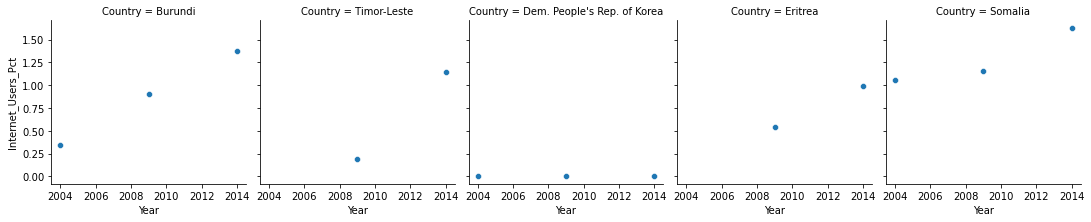

In [59]:
q30=sns.FacetGrid(bottom_5_internet, col="Country")
q30.map_dataframe(sns.scatterplot, x="Year", y="Internet_Users_Pct")
q30.set_axis_labels("Year","Internet_Users_Pct")


### Question 31 Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [60]:
y2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80


In [61]:
y2014_top5_GDP=y2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head()

In [62]:
y2014_top5_GDP.info

<bound method DataFrame.info of                Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014   156514.133850                 NaN
3691        Luxembourg  2014   108760.916030               94.67
5138             Qatar  2014    95578.416973               91.49
5464         Singapore  2014    87808.663157               82.00
561            Bermuda  2014    77361.104881               96.80>

In [63]:
top_5_GDP=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(y2014_top5_GDP.Country) & gdp_and_internet_use['Year'].isin(q13year)]

In [64]:
top_5_GDP.info

<bound method DataFrame.info of                Country  Year  GDP_Per_Capita  Internet_Users_Pct
561            Bermuda  2014    77361.104881           96.800000
566            Bermuda  2009    89961.982744           83.250000
571            Bermuda  2004    90195.811033           60.990867
3691        Luxembourg  2014   108760.916030           94.670000
3696        Luxembourg  2009   104932.811953           87.310000
3701        Luxembourg  2004   102708.212547           65.880000
3721  Macao SAR, China  2014   156514.133850                 NaN
3726  Macao SAR, China  2009    95939.340822                 NaN
3731  Macao SAR, China  2004    72944.409424                 NaN
5138             Qatar  2014    95578.416973           91.490000
5143             Qatar  2009    89954.519993           53.100000
5148             Qatar  2004    93748.301216           20.701648
5464         Singapore  2014    87808.663157           82.000000
5469         Singapore  2009    69466.581746           69.

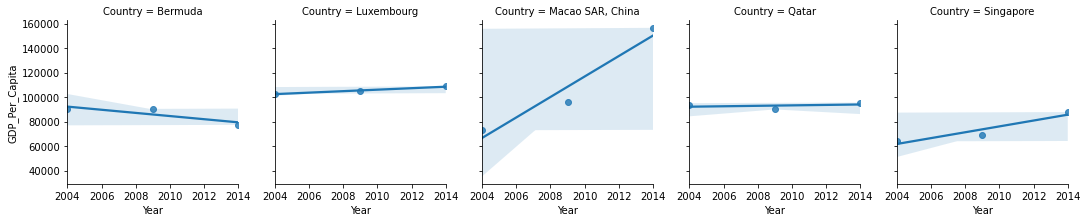

In [65]:
q31=sns.FacetGrid(top_5_GDP, col="Country")
q31.map_dataframe(sns.regplot, x="Year", y="GDP_Per_Capita")
q31.set_axis_labels("Year","GDP_Per_Capita")


### Question 32 Repeat this one more time to look at 10-year trend for the 5 countries for 2014 with the lowest GDP per capita.

In [66]:
y2014.sort_values(by = 'GDP_Per_Capita', ascending = True).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95


In [67]:
y2014_bottom5_GDP=y2014.sort_values(by = 'GDP_Per_Capita', ascending = True).head()

In [68]:
y2014_bottom5_GDP.info

<bound method DataFrame.info of                        Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN
827                    Burundi  2014      886.235777                1.38
3781                    Malawi  2014     1027.208496                5.83
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
4528                     Niger  2014     1127.615541                1.95>

In [69]:
bottom_5_GDP=gdp_and_internet_use[gdp_and_internet_use['Country'].isin(y2014_bottom5_GDP.Country) & gdp_and_internet_use['Year'].isin(q13year)]

In [70]:
bottom_5_GDP.info

<bound method DataFrame.info of                        Country  Year  GDP_Per_Capita  Internet_Users_Pct
827                    Burundi  2014      886.235777            1.380000
832                    Burundi  2009      831.564131            0.900000
837                    Burundi  2004      817.460585            0.349060
1047  Central African Republic  2014      822.610458                 NaN
1052  Central African Republic  2009     1161.189475                 NaN
1057  Central African Republic  2004     1037.846766                 NaN
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
1427           Dem. Rep. Congo  2009      835.611696                 NaN
1432           Dem. Rep. Congo  2004      757.685942                 NaN
3781                    Malawi  2014     1027.208496            5.830000
3786                    Malawi  2009      932.867635            1.070000
3791                    Malawi  2004      775.346132            0.347505
4528               

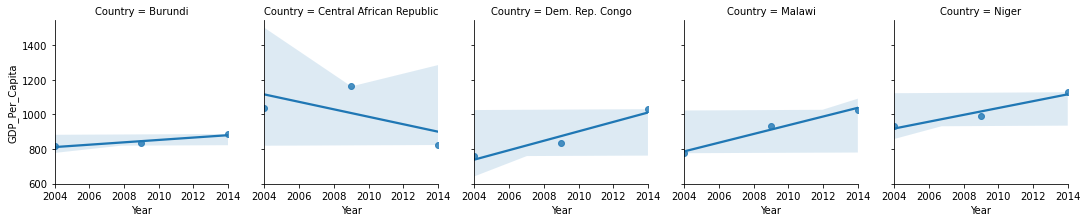

In [71]:
q31=sns.FacetGrid(bottom_5_GDP, col="Country")
q31.map_dataframe(sns.regplot, x="Year", y="GDP_Per_Capita")
q31.set_axis_labels("Year","GDP_Per_Capita")


### Question 33 Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?

### Bonus Question: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.